# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

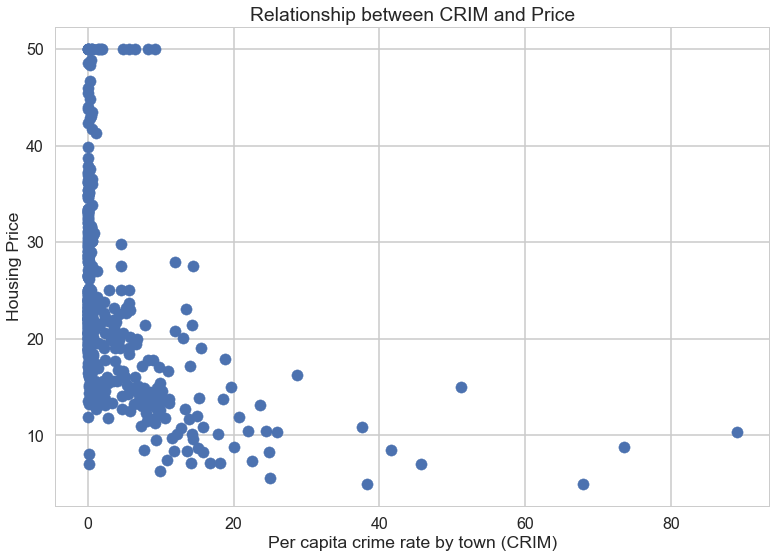

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

The relationship is negative, non-linear. AS per capita crime rate 
increases, housing price decreases. At places where 
per capita crime rate is nearing zero, housing prices tend to go up 
really high, plateauing at around 50. 

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Text(0.5, 1.0, 'Relationship between RM and Price')

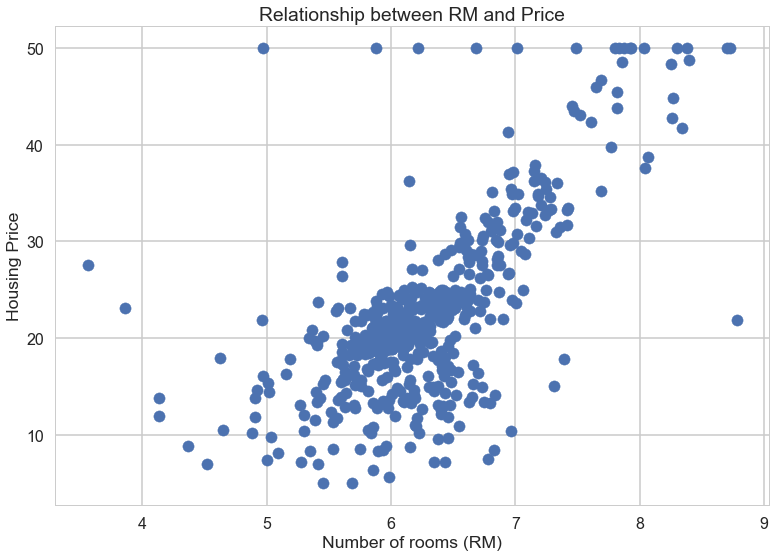

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

The relationship is positive, linear. As number of rooms increases, 
the housing price increases.There are few outliers where even if the
number of rooms are on the low side, the housing price is relatively high. 

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

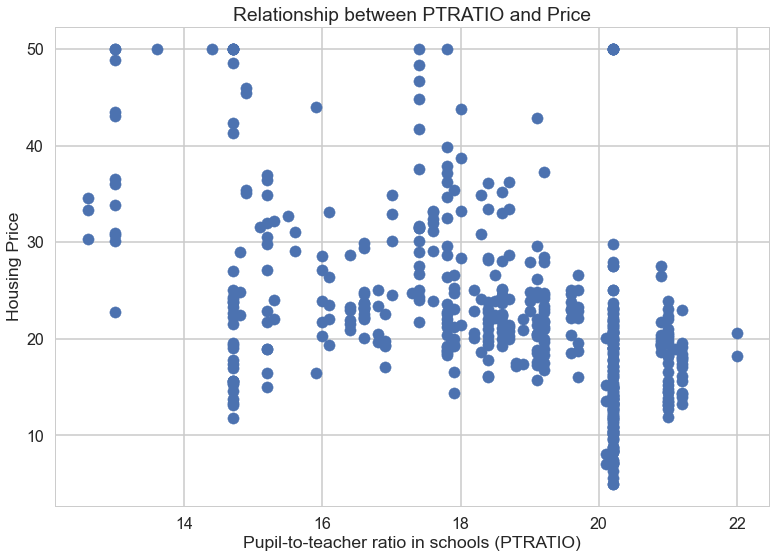

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-teacher ratio in schools (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

The relationship is negtive, non linear. AS pupil to teacher ratio 
increases, housing price tends to decrease. However, the relationship 
is not smooth. For a given pupil to teacher ratio, there is a wide
distribution of housing prices. As the pupil to teacher ratio increases,
the distribution of housing prices tends to shift down

Text(0.5, 1.0, 'Relationship between DIS and Price')

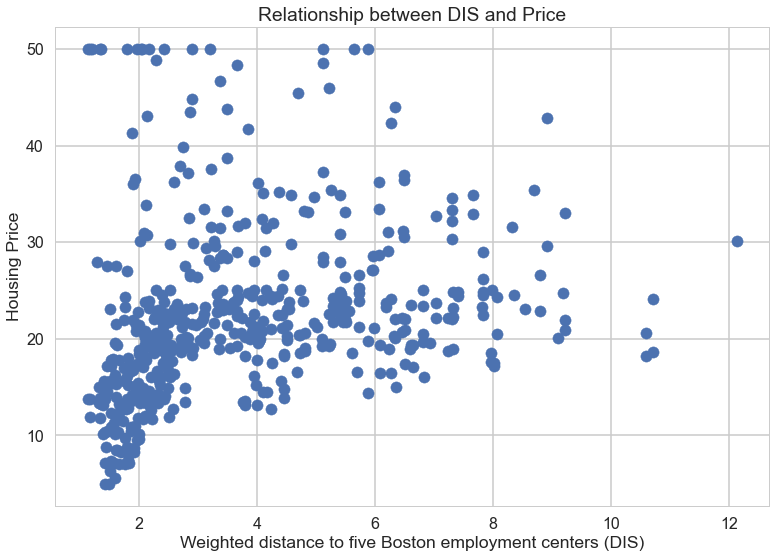

In [15]:
# your turn: create some other scatter plots
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distance to five Boston employment centers (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

The relationship is linear, positive for weighted distance having values around 1 to about 3. At values of weighted distance > 3, there seems to be no correlation.

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

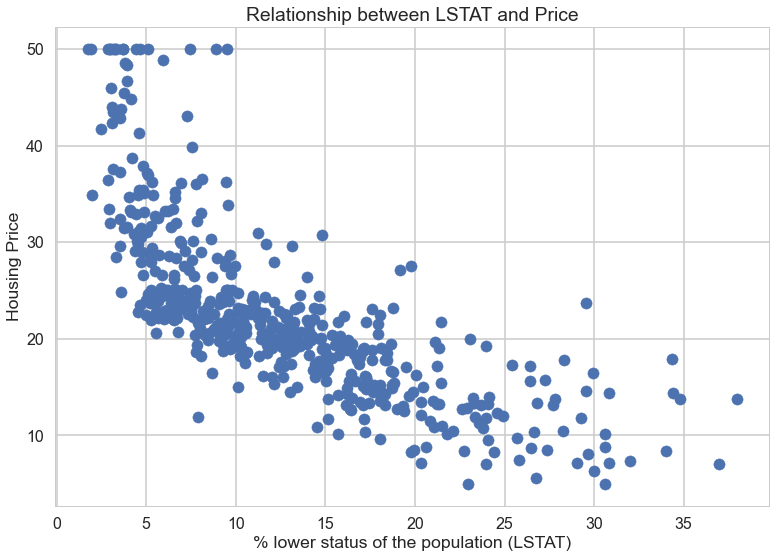

In [16]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

The relationship is negative, linear. As the %of lower status population increases, housing prices decreases.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

C:\Users\sanjiv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


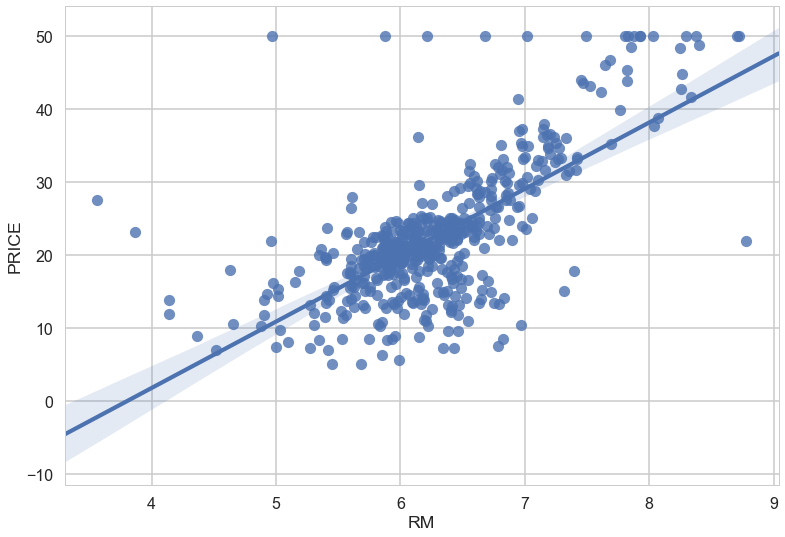

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg=True)

### Histograms
***


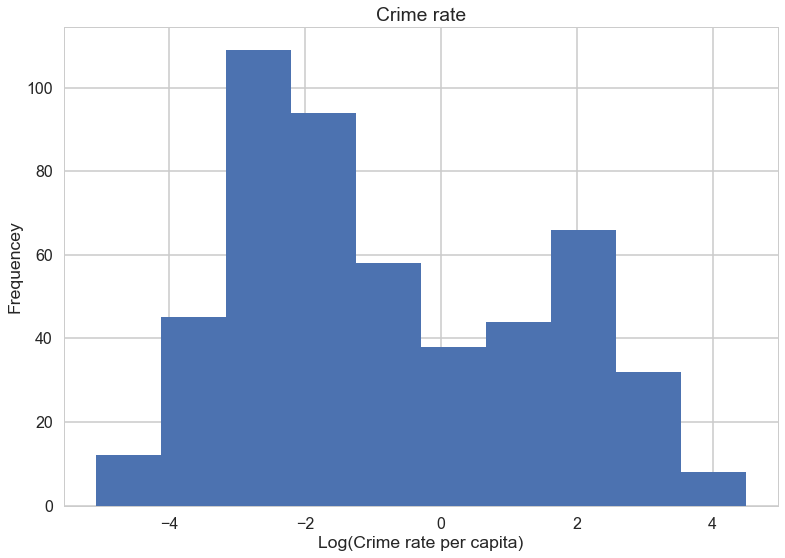

In [18]:
plt.hist(np.log(bos.CRIM))
plt.title("Crime rate")
plt.xlabel("Log(Crime rate per capita)")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

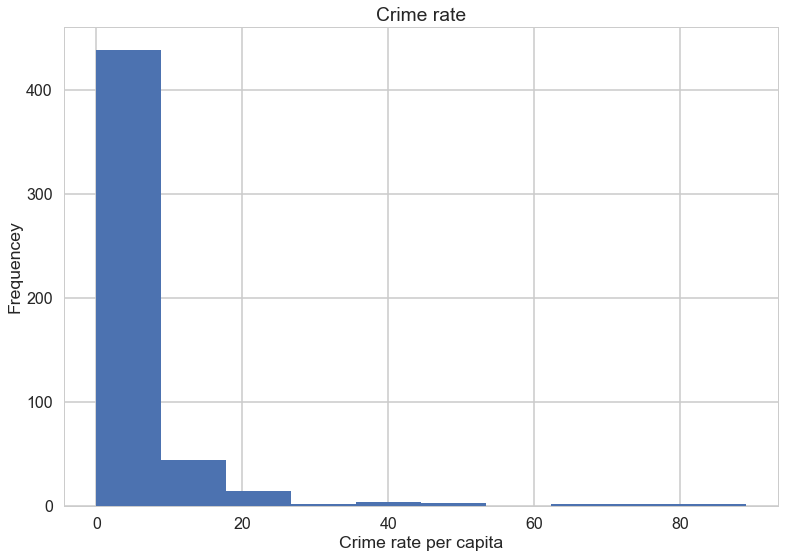

In [19]:
#your turn
plt.hist(bos.CRIM)
plt.title("Crime rate")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

The above graph is skewed in distribution. The purpose of taking log is to 
normalize the distribution. After taking the log, the distribution comes out
somewhat close to normal distribution. Linear regression models work better with normally distributed variables. 

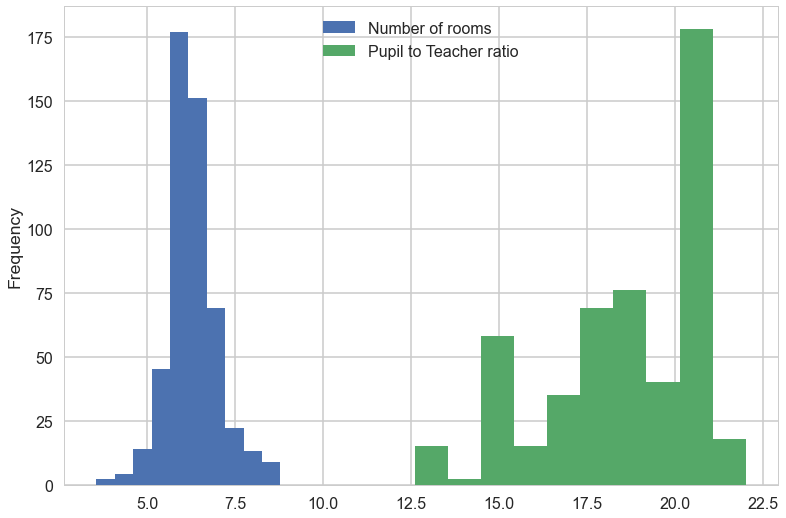

In [20]:
plt.hist(bos.RM, label='Number of rooms')
plt.hist(bos.PTRATIO, label='Pupil to Teacher ratio')
plt.legend()
plt.ylabel('Frequency')
plt.show()

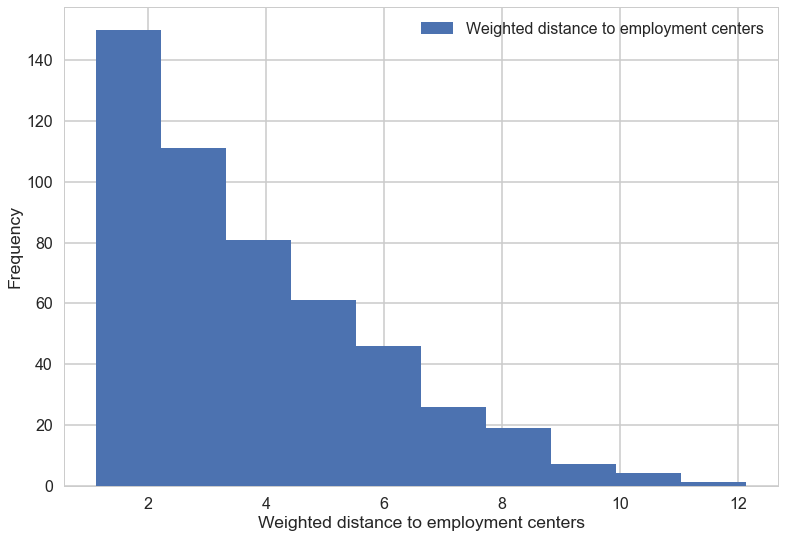

In [21]:
plt.hist(bos.DIS, label='Weighted distance to employment centers')
plt.legend()
plt.xlabel("Weighted distance to employment centers")
plt.ylabel("Frequency")
plt.show()

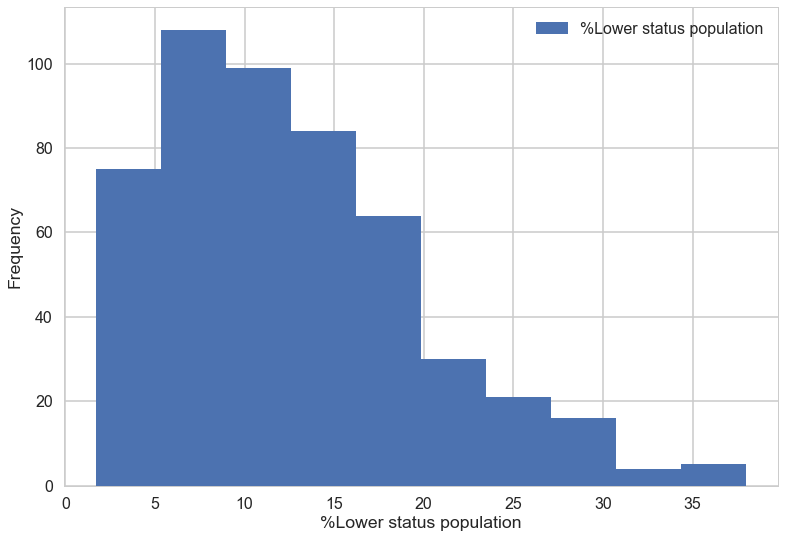

In [22]:
plt.hist(bos.LSTAT, label='%Lower status population')
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("%Lower status population")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [180]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model_1variable = ols('PRICE ~ RM',bos).fit()
print(model_1variable.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.49e-74
Time:                        00:21:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0, 0.5, 'Original prices')

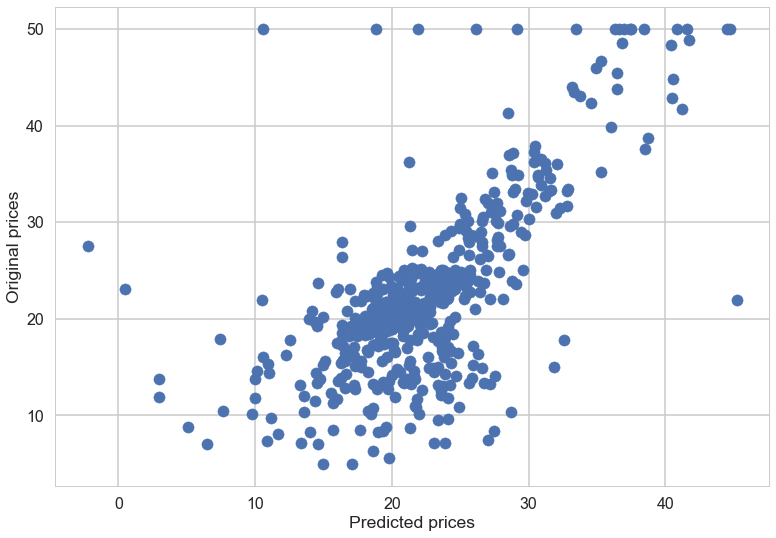

In [25]:
# your turn
plt.scatter(model_1variable.fittedvalues,bos.PRICE)
plt.xlabel('Predicted prices')
plt.ylabel('Original prices')

The relationship between predicted prices and original prices is positive, linear (except for outliers) and the slope of the graph tends to be around 1 which means that predicted prices mostly match the original prices. For the outliers, the predicted prices seem to underestimate the originial prices based on their values. 

### Fitting Linear Regression using `sklearn`


In [26]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [27]:
# Look inside lm object
lm.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [28]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [29]:
# your turn
lm_nointercept = LinearRegression(fit_intercept=False)
lm_nointercept.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

1. I would not recommend not having an intercept because not having an intercept is for the case when all the independent variables are zero and the dependent varible ( in this case, box.PRICE) also happens to be zero. It is highly unlikely that even if all the independent variables (i.e. different factors/features that influence the price of the house) are zero, the housing price is going to be zero. 

2. It is not enough that residuals are normally distributed because normal distribution doesn't imply i.i.d which is a necessary assumption for a linear model. For example, residuals could all have normal distributions but with different means and different variances. This would result in non-identical distributions. 

3. False. Y doesn't have to be normally distributed to use linear regression. It is that the residuals i.e. error terms have to have to be i.i.d, in other words the same normal distribution (mean 0, some constant variance) so that on average, the predicted values fit 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [30]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.459488385089585


In [31]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [32]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [33]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Text(0, 0.5, 'Frequency')

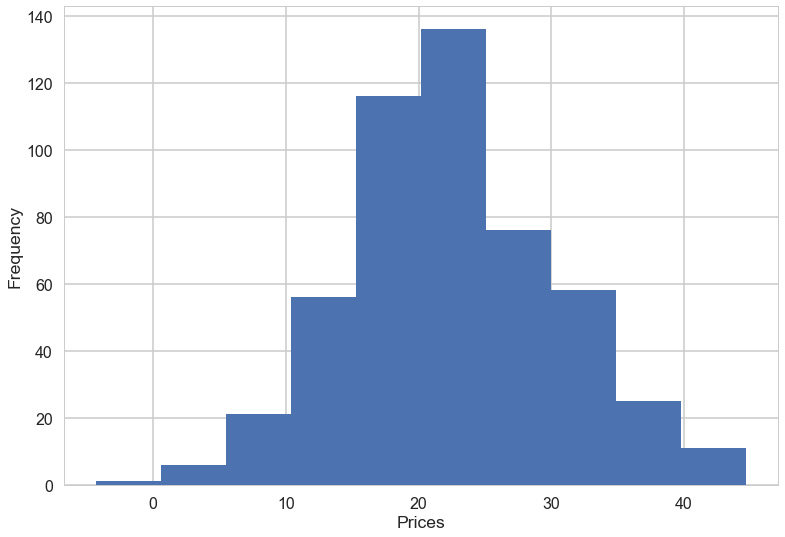

In [34]:
# your turn
plt.hist(lm.predict(X))
plt.xlabel('Prices')
plt.ylabel('Frequency')

The grapsh has normal distribution, with mean about 20 and standard deviation 
of about 10. There are no outliers. 

Text(0.5, 0, 'Predicted prices')

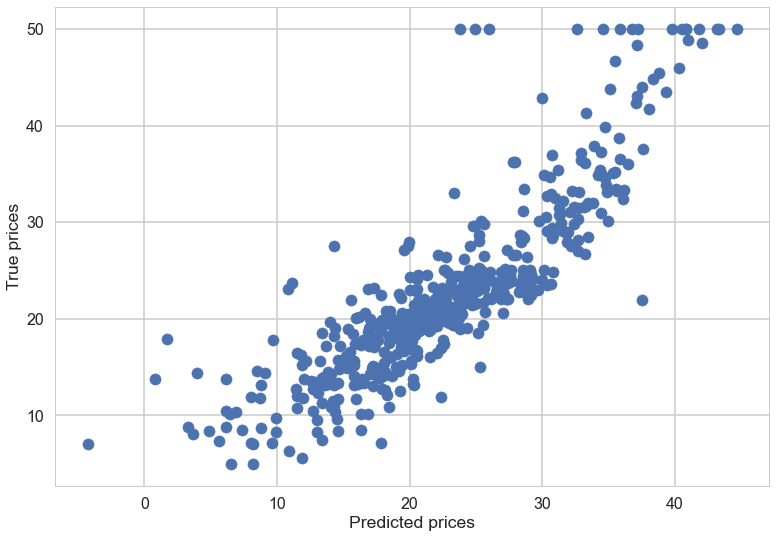

In [35]:
plt.scatter(lm.predict(X),bos.PRICE)
plt.ylabel('True prices')
plt.xlabel('Predicted prices')

Based on graph above, the true prices seem to agree with predicted prices for the most part. 

Statsmodels is oriented towards identifying predictors that have most impact on the
response variable and their different impacts whereas scikit-learn is oriented towards
building a prediction model based on current predictors

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [36]:
print("Residual sum of squares (RSS) =",np.sum((bos.PRICE - lm.predict(X)) ** 2))

Residual sum of squares (RSS) = 11078.784577954979


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [37]:
print("Explained sum of squares (ESS) = ",np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

Explained sum of squares (ESS) =  31637.510837064554


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [38]:
# your turn
linear_regression_ptratio = LinearRegression()
ptratio = pd.DataFrame(bos.PTRATIO)
price = bos.PRICE
linear_regression_ptratio.fit(ptratio,price)
print("Coefficient :", linear_regression_ptratio.coef_, "\nIntercept :",linear_regression_ptratio.intercept_)


Coefficient : [-2.1571753] 
Intercept : 62.34462747483259


Coefficient of -2.15 implies that for unit increase in PTRATIO (pupil-teacher ratio), the housing price decreases by 2.15 
units.Essentially, what this means is that housing price is inversely proportional to pupil-teacher ratio i.e. if 
pupil-teacher ratio goes up, the housing price tends to go down and vice versa.

Intercept of 62.34 implies that if the housing price was only affected by pupil-teacher ratio, the maximum price for the 
house would be 62.34 units. This is for the case when pupil-teacher ratio is zero. As the pupil-teacher ratio starts 
increasing, the housing price will start decreasing. 

In [39]:
# Calculate R squared

from sklearn.metrics import r2_score

y_true = price
y_pred = linear_regression_ptratio.predict(ptratio)
r_squared = r2_score(y_true, y_pred)
print("R squared: ", r_squared)


R squared:  0.257847318009223


R squared of 25.78% tells us that pupil-teacher ratio explains about 25% of variance in housing price.

In [40]:
# Calculate F-statistic
n = len(price)
k = 1 # since there is only one variable/feature i.e. ptratio

f_statistic = (r_squared/(1-r_squared))*((n-k-1)/k)
print("F-statistic :", f_statistic)

#Calculate t-statistic
model_ptratio = ols('PRICE ~ PTRATIO',bos).fit()
print(model_ptratio.summary())


F-statistic : 175.10554287569548
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.61e-34
Time:                        11:18:48   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.34

Based on above results, F-statistic = 175.1 and t-statistic = -13.2. 

Since P>|t| = 0.0, p_value is less than 0.05 and hence we can reject the null hypothesis i.e. hypothesis that ptratio has no statistically significant impact on price. 

Similarly, since Prob(F-statistic) = 1.61e-34, p_value is less than 0.05 and hence we can reject the null hypothesis here as well.


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [41]:
# Use Linear regression
new_X = bos[['CRIM','RM','PTRATIO']]
lm_3variables = LinearRegression()
lm_3variables.fit(new_X,bos.PRICE)

print("Coefficients of linear regression ['CRIM','RM','PTRATIO']:",lm_3variables.coef_)
print("Intercept of linear regression :", lm_3variables.intercept_)

Coefficients of linear regression ['CRIM','RM','PTRATIO']: [-0.20496083  7.3804111  -1.0695461 ]
Intercept of linear regression : -3.3707043351542367


In [42]:
# Use statsmodels
model_3variables = ols('PRICE ~ CRIM+RM+PTRATIO',bos).fit()
print(model_3variables.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           6.15e-98
Time:                        11:18:48   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

Discussion of results:

From above results, F-Statistic is 245.2 and Prob(F-statistic) is 6.15e-98. Since p-value i.e. prob(F-statistic) < 0.05, we can reject the null hypothesis i.e. hypothesis that the coefficients of all the 3 independent variables are zero and accept the alternate hypothesis i.e. hypotheis that at least coefficient of one of the indepedent variables are non-zeo. Based on this, values that we obtain for the 3 coefficients are statistically significant. 

R squared is 59.4%. This means that the 3 independent variables account for about 60% of the variance in the price for the homes in Boston area. 

Comparing the impact of 3 independent variables (CRIM, RM, PTRATI) on Price, we can see that RM (rooms per house) has the 
most impact on Price since its coefficient has the highest magnitude i.e when number of rooms changes by one unit, the Price 
changes by about 7.3804 * 1000 = 7380 units assuming other independent variables are constant. After RM, PTRATIO (Pupil to teacher ratio) has the most impact, followed by CRIM (Crime rate).


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [43]:
# Try with 2 extra variables LSTAT and INDUS
model_5variables = ols('PRICE ~ CRIM+RM+PTRATIO+INDUS+LSTAT',bos).fit()
print(model_5variables.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.1
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          8.89e-122
Time:                        11:18:49   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0028      3.981      4.271      0.0

Based on results above, we see that P>|t| for INDUS is 0.602 which is much bigger than threshhold of 0.05. Now I try with 
just 1 extra variable LSTAT to see if I can get better result.

In [44]:
# Try with 1 extra variables LSTAT
model_4variables = ols('PRICE ~ CRIM+RM+PTRATIO+LSTAT',bos).fit()
print(model_4variables.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     268.0
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          5.84e-123
Time:                        11:18:49   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9233      3.976      4.257      0.0

From results above, we can see that we get similar R squared (i.e. 68.1%) but for fewer number of variables i.e. 4 vs 5.
Since P>|t| for all 4 independent variables are less than the threshhold value of 0.05 (assuming
95% confidence interval), the coefficients obtained for all 4 independent variables are statistically significant. 
Hence, the model with 4 independent variables (CRIM, RM, PTRATIO, LSTAT) is a better model than the model with 5 variables.

Now, we compare model with 4 variables to model with 3 variables in terms of F-statistic and AIC:

    F-statistic for 4 variable model : 268 (Higher value indicates better model)
    F-statistic for 3 variable model : 245
        
    AIC for 4 variable model: 3112 (Lower value indicates better model)
    AIC for 3 variable model: 3232

WE can see that 4 variable model is a better model


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [59]:
# Variables needed for calculations

# fitted values
model_fitted_y = model_3variables.fittedvalues

# model residuals
model_residuals = model_3variables.resid

# normalized residuals
model_norm_residuals = model_3variables.get_influence().resid_studentized_internal

# leverage
model_leverage = model_3variables.get_influence().hat_matrix_diag

# cook's distance
model_cooks = model_3variables.get_influence().cooks_distance[0]

Text(0.5, 0, 'Fitted values')

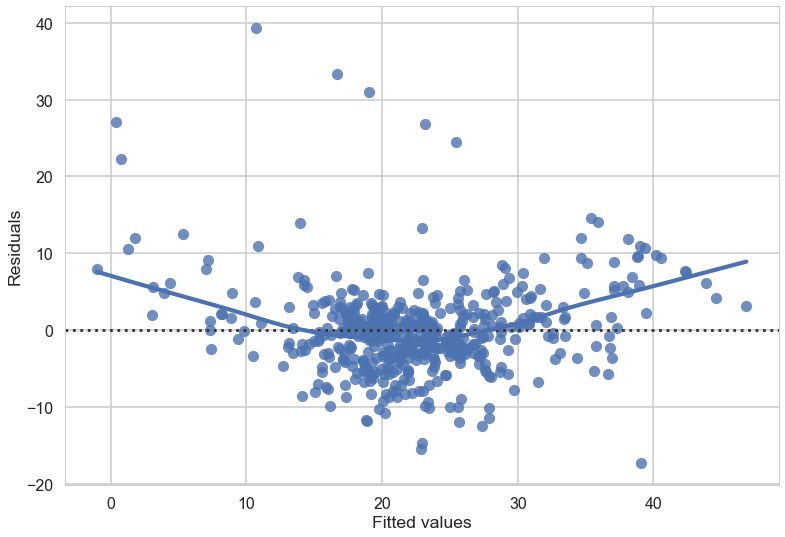

In [60]:
# Residuals vs Fitted values plot
sns.residplot(model_fitted_y, price, lowess=True)
plt.ylabel("Residuals")
plt.xlabel("Fitted values")

Based on Residuals vs Fitted values plot above, we observe that the distribution of residuals does not resemble that of random noise. The distribution actually shows a pattern as indicated by the solid line. This indicates that the residuals are non-linearly distributed and hence this indicates that the data has some non-linearities that are not being correctly
modelled by the linear model.

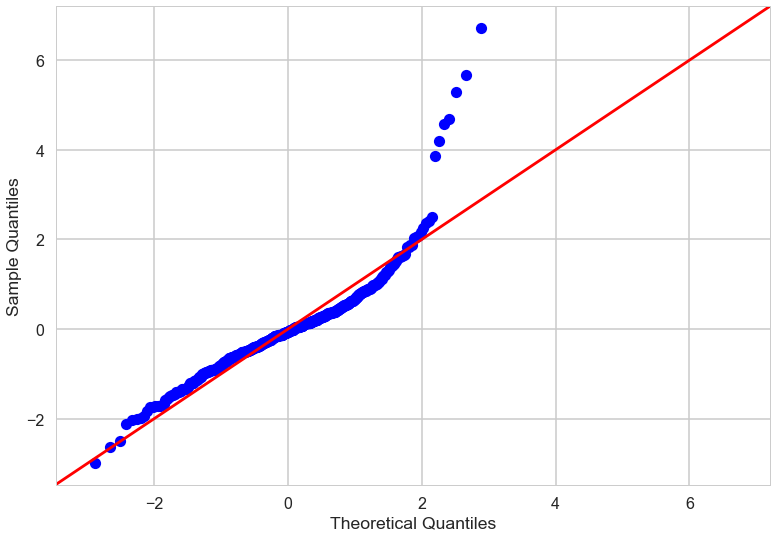

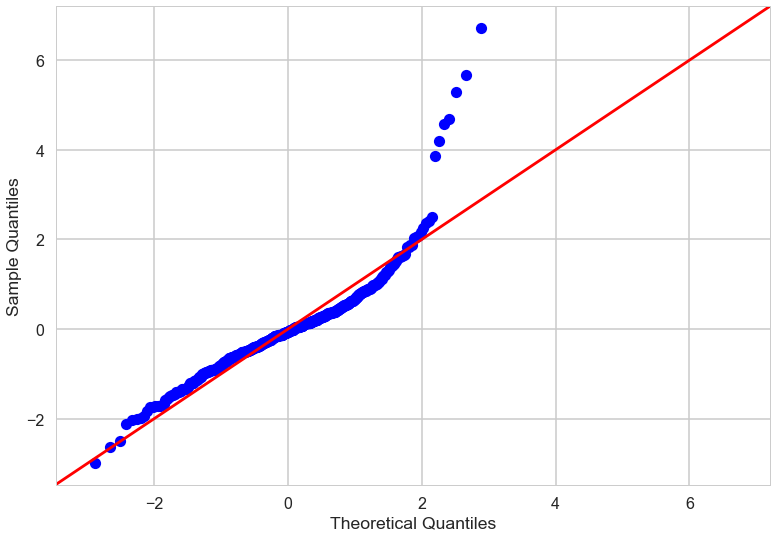

In [61]:
# Normal probability plot (QQ plot)

from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
QQ.qqplot(line="45")

Based on QQ plot above, we can see that sample quantiles (blue dots) don't fit well with the theoretical quantiles (solid red line) especially after theorential quantiles > 2. What this tells us is that normality assumption for residuals doesn't fully hold true in this case. This implies that the fitted model has "heavy tails" on the positive side and hence we are more likely to see extreme values on the positive side  than to be expected if the residuals was truly normally distributed. 

#Comparison of Residuals vs Fitted plot with QQ plot:

    From Residuals vs Fitted plots, we can find out following things:
    1. Whether the linearity assumption (i.e. there is linear relationship between each of dependent variables and the 
        independent variable) for linear regression is satisfied or not. If the plot shows random noise like 
       behavior, then linearity assumption holds. If the plot shows a non-random pattern, then linearity assumption doesn't
       hold
    2. Whether the equal variance assumption (i.e. residuals have equal variance as Fitted value increases) for linear 
       regression is satisfied or not. If the plot shows the behavior where for example residuals are closer to each other
       for small values of Fitted value and tend to spread around for large values of Fitted value, then equal variance
       assumption doesn't hold. If plot shows random noise like behavior, then equal variance assumption holds.
       
    From QQ plot, we can find out following things:
    1. Whether the normality assumption (i.e. residuals have normal distribution) for linear regression is satisfied or not.
       If the plot shows points that lie somewhat close to the diagonal line, then normality assumption holds. If not, 
       normality assumption doesn't hold.
    
    

Outliers at following indexes: [365, 367, 368, 369, 370, 371, 372]


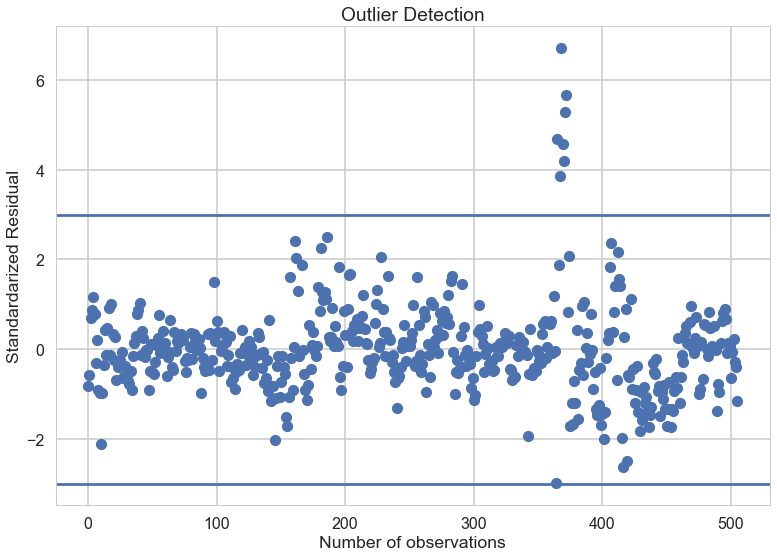

In [126]:
# Identify outliers

plt.plot(model_norm_residuals,'o')
plt.axhline(y=3)
plt.axhline(y=-3)
plt.xlabel("Number of observations")
plt.ylabel("Standardarized Residual")
plt.title("Outlier Detection")

# Find index of observations that are outliers. Define outliers as having absolute value of Standardarized residual > 3
index_holder_outliers = []
for i in range(0,len(model_norm_residuals)):
    if (abs(model_norm_residuals[i]) > 3):
        index_holder_outliers.append(i)

print("Outliers at following indexes: {}".format(index_holder_outliers))

BAsed on graph above, we can see that there are 7 observations that lie above the value of 3 for Standardarized Residual. Here, outlier is defined as those observations that have Standardarized REsidual value of > 3 or < -3. 

The outliers represent those observations where the observed housing prices are significantly different from those predicted by the linear regression model. In this case, the 7 observations have actual housing prices that are significantly higher than what is predicted by linear regression model.

Threshold leverage =  0.023715415019762855
High leverage observations at following indexes: [225, 257, 262, 267, 364, 365, 367, 380, 398, 404, 405, 406, 410, 414, 418, 427]


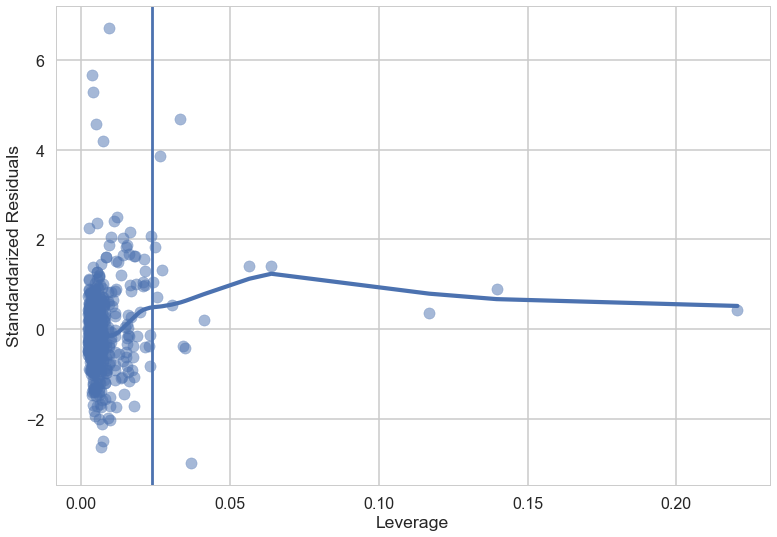

In [127]:
# Leverage plot
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True)

mean_leverage = sum(model_leverage)/len(model_leverage)
threshold_leverage = 3*mean_leverage
print("Threshold leverage = ",threshold_leverage)

# Find the indexes of observations that are high leverage. Define high leverage as leverage > threshold leverage
index_holder_highleverage = []
for i in range(0,len(model_leverage)):
    if (abs(model_leverage[i]) > threshold_leverage):
        index_holder_highleverage.append(i)

print("High leverage observations at following indexes: {}".format(index_holder_highleverage))

plt.xlabel("Leverage")
plt.ylabel("Standardarized Residuals")
plt.axvline(x=threshold_leverage)

Based on graph above, we can see that there are several possible high leverage points (High leverage is defined as having leverage > threshold leverage) 

Reason for high leverage is that one or more or some combination of the independent variables (in this case, CRIM, RM or PTRATIO) has/have extreme value which could be due to data collection issues, data entry issues.

In [167]:
# Remove outliers and high leverage points to create a new dataset 
index_holder_combined = list(set(index_holder_outliers + index_holder_highleverage))
index_holder_combined.sort()

bos_outliers_highleveragepoints_removed = bos.drop(bos.index[index_holder_combined])

In [168]:
#Run linear regression on the new dataset 
model_3variables_outliers_highleveragepoints_removed = ols('PRICE ~ CRIM+RM+PTRATIO',bos_outliers_highleveragepoints_removed).fit()
print(model_3variables_outliers_highleveragepoints_removed.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     400.5
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          2.41e-130
Time:                        23:26:03   Log-Likelihood:                -1416.8
No. Observations:                 485   AIC:                             2842.
Df Residuals:                     481   BIC:                             2858.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6891      3.280     -2.954      0.0

In [169]:
# Compare against results of linear regression on old dataset (i.e. where outliers and high leverage points were not removed)
model_3variables = ols('PRICE ~ CRIM+RM+PTRATIO',bos).fit()
print(model_3variables.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           6.15e-98
Time:                        23:26:42   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

Based on results for new dataset and old dataset above, we can see that :

1. Values for Intercept and CRIM, RM and PTRATIO have changed when going from old dataset to new dataset resulting in a new model and hence different predictions.
2. Adj. R-squared has gone up from 0.592 (old dataset) to 0.712 (new dataset). Essentially, higher amount of variance in the response variable is explained by the new model which is what we want. 
3. AIC has gone down from 3232 (old dataset) to 2842 ( new dataset). Smaller the AIC score, better which is what we want.
4. F-statistic has done up from 245.2 (old dataset) to 400.5 (new dataset). Higher the F-statistic, better which is what we want.

Based on above points, we can see that the new model is a better model than old model, assuming that it made sense to remove the outliers and high leverage points. 

Furthermore the new model is still statistically significant since Prob(F-Statistic) is much less than 0.05 (assuming 95% confidence level).



Text(0.5, 0, 'Fitted values')

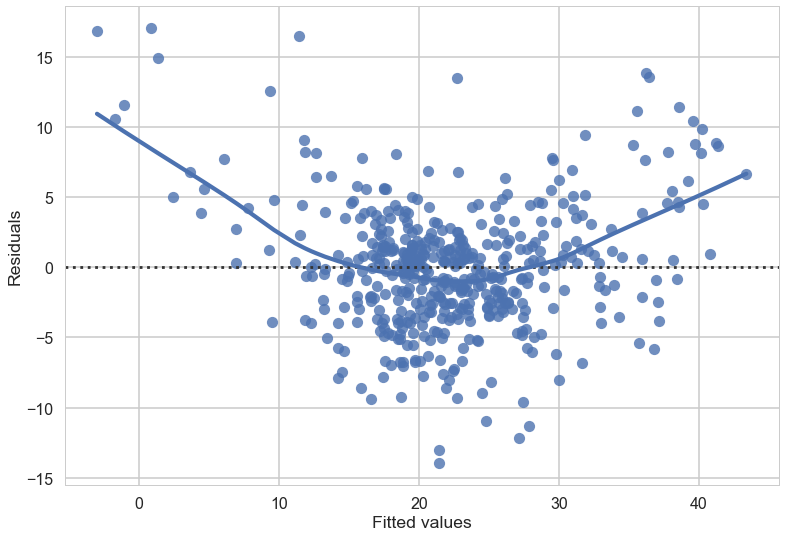

In [175]:
# Lets look at Residuals vs Fitted values plot and QQ plot for the new dataset

# fitted values
reducedmodel_fitted_y = model_3variables_outliers_highleveragepoints_removed.fittedvalues

# model residuals
reducedmodel_residuals = model_3variables_outliers_highleveragepoints_removed.resid

# normalized residuals
reducedmodel_norm_residuals = model_3variables_outliers_highleveragepoints_removed.get_influence().resid_studentized_internal

sns.residplot(reducedmodel_fitted_y, bos_outliers_highleveragepoints_removed['PRICE'], lowess=True)
plt.ylabel("Residuals")
plt.xlabel("Fitted values")

Based on graph above, we can see that even with the new dataset, the issue of non-linearity is still not resolved since the residuals still show non-random pattern of behavior. Various data transformations would need to be tried on independent variables and/or dependent variable to identify which one would address this issue. 

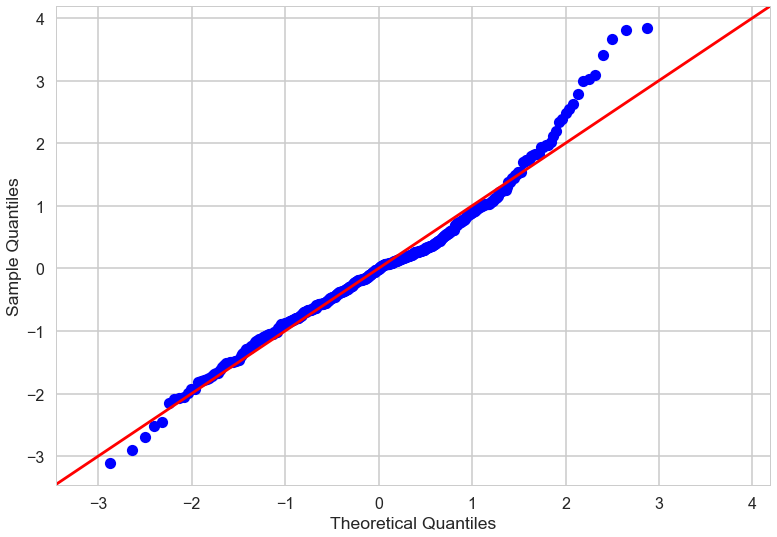

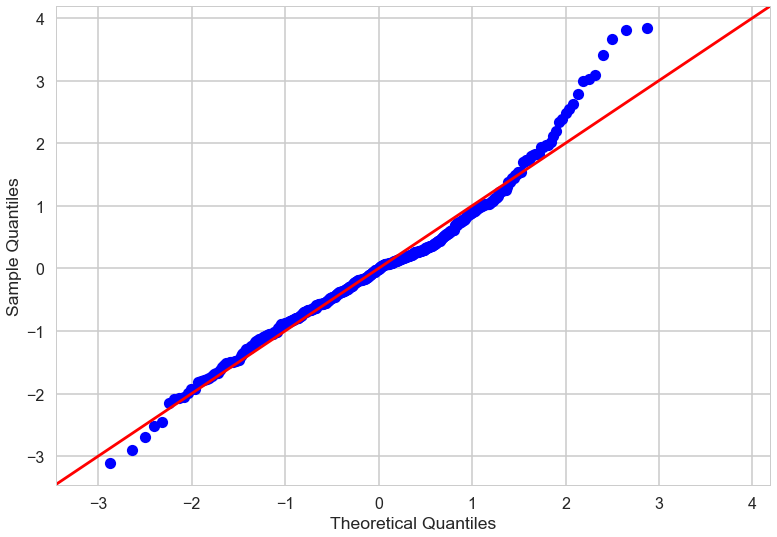

In [176]:
QQ = ProbPlot(reducedmodel_norm_residuals)
QQ.qqplot(line="45")

Based on graph above, we can see that this QQ plot looks much better than that for the old dataset since there are fewer blue points which are not close to the red line, indicating less likelihood of extreme values. 